In [139]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from scipy import stats 

In [140]:
Time = pd.read_csv("delivery_time.csv")

In [141]:
pd.set_option("display.max_rows",None)
Time 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [142]:
Time.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


{'whiskers': [<matplotlib.lines.Line2D at 0x200e4d42640>,
 'caps': [<matplotlib.lines.Line2D at 0x200e4d42d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x200e4d422b0>],
 'medians': [<matplotlib.lines.Line2D at 0x200e4d4f4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200e4d4f850>],
 'means': []}

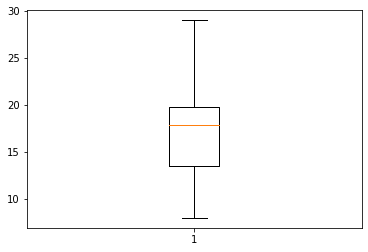

In [145]:
plt.boxplot(Time.Delivery_Time)

{'whiskers': [<matplotlib.lines.Line2D at 0x200e4d9f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x200e4d9fd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x200e4d9f250>],
 'medians': [<matplotlib.lines.Line2D at 0x200e4da8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x200e4da87f0>],
 'means': []}

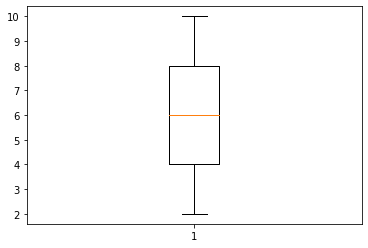

In [146]:
plt.boxplot(Time.Sorting_Time)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

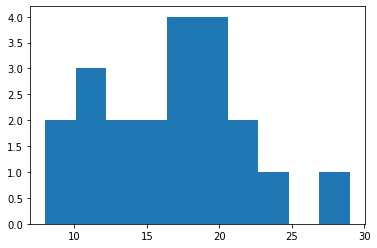

In [147]:
plt.hist(Time.Delivery_Time)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

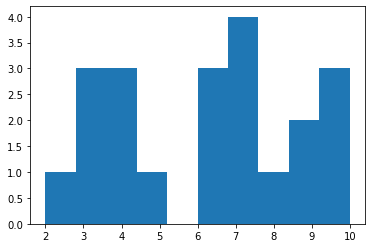

In [148]:
plt.hist(Time.Sorting_Time)

Text(0, 0.5, 'Sorting_Time')

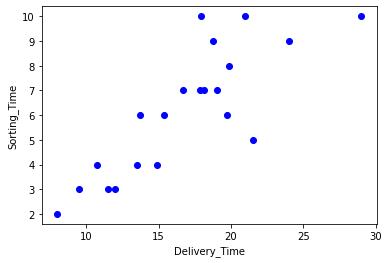

In [149]:
plt.plot(Time.Delivery_Time,Time.Sorting_Time,"bo")
plt.xlabel("Delivery_Time")
plt.ylabel("Sorting_Time")

C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

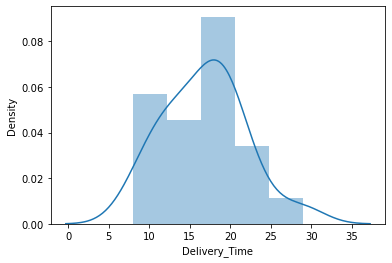

In [151]:
sns.distplot(Time['Delivery_Time'])

C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

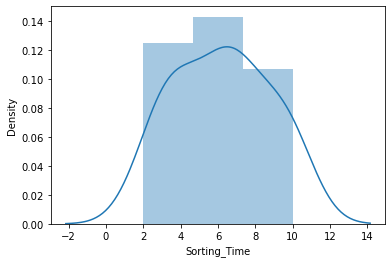

In [152]:
sns.distplot(Time['Sorting_Time'])

In [153]:
Time.describe() 

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [154]:
Time.Sorting_Time.corr(Time.Delivery_Time)

0.8259972607955327

In [155]:
Time.Delivery_Time.corr(Time.Sorting_Time)

0.8259972607955327

In [156]:
Time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

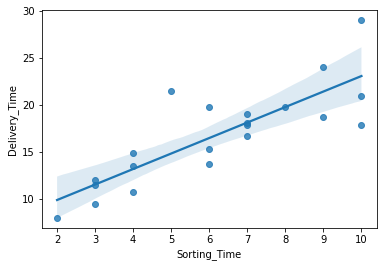

In [158]:
#target variable y should be Continous data
sns.regplot(x= Time['Sorting_Time'],y= Time['Delivery_Time'])

In [144]:
#renaming the column names
Time=Time.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
Time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [159]:
#model building the target variable should be Continous data ,so (Delivery Time ~ Sorting Time)
model=smf.ols("Delivery_Time~Sorting_Time",data=Time).fit()

In [160]:
#model testing
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        13:39:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
#tvalue and Pvalue
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [162]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [163]:
#r-squared and Adjusted r-squared
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [164]:
#predicting sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [165]:
#predicting sorting for 5,7,9
data=pd.Series([5,7,9])
data

0    5
1    7
2    9
dtype: int64

In [166]:
data_pred=pd.DataFrame(data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,7
2,9


In [167]:
model.predict(data_pred)

0    14.827833
1    18.125873
2    21.423913
dtype: float64

In [168]:
model.summary()
model.resid 
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [169]:
pred = model.predict(Time.iloc[:,:])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [170]:
model.resid_pearson 
model.resid 

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [171]:
rmse_lin=np.sqrt(np.mean((np.array(Time['Delivery_Time'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Text(0, 0.5, 'Delivery_Time')

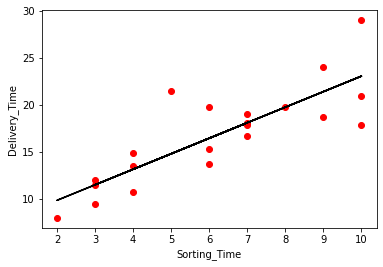

In [172]:
plt.scatter(x=Time['Sorting_Time'],y=Time['Delivery_Time'],color='red')
plt.plot(Time['Sorting_Time'],pred,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [173]:
#model testing 2
model2=smf.ols('Delivery_Time~np.log(Sorting_Time)',data=Time).fit()

In [174]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        13:40:00   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [176]:
model2.resid
model2.resid_pearson

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [177]:
pred2=model2.predict(pd.DataFrame(Time['Sorting_Time']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [178]:
rmse_log=np.sqrt(np.mean((np.array(Time['Delivery_Time'])-np.array(pred2))**2))
rmse_log

2.7331714766820663

In [179]:
pred2.corr(Time.Delivery_Time)

0.8339325279256244

Text(0, 0.5, 'Delivery_Time')

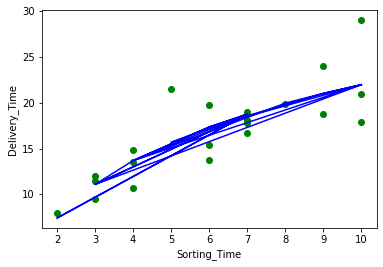

In [180]:
plt.scatter(x=Time['Sorting_Time'],y=Time['Delivery_Time'],color='green')
plt.plot(Time['Sorting_Time'],pred2,color='blue')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [181]:
#model testing 3
model3=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=Time).fit()

In [182]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 15 Feb 2022   Prob (F-statistic):           1.59e-06
Time:                           13:40:39   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
model3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [184]:
pred_log=model3.predict(pd.DataFrame(Time['Sorting_Time']))

In [185]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [186]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [187]:
rmse_exp=np.sqrt(np.mean((np.array(Time['Delivery_Time'])-np.array(pred3))**2))
rmse_exp

2.940250323056201

In [188]:
pred3.corr(Time.Delivery_Time)

0.8085780108289262

Text(0, 0.5, 'Delivery_Time')

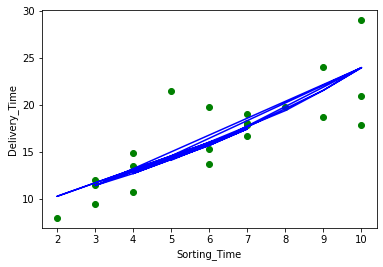

In [189]:
plt.scatter(x=Time['Sorting_Time'],y=Time['Delivery_Time'],color='green')
plt.plot(Time.Sorting_Time,pred3,color='blue')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [190]:
resid=model3.resid_pearson
resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

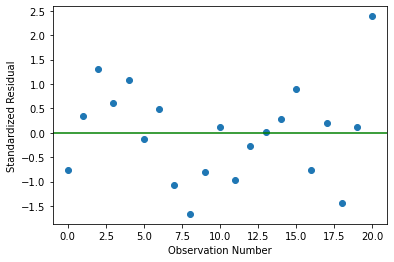

In [191]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

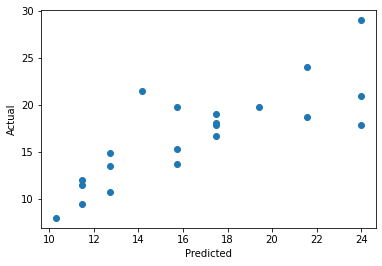

In [192]:
plt.scatter(x=pred3,y=Time.Delivery_Time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [193]:
Time["Sorting_Time_Sq"]=Time.Sorting_Time*Time.Sorting_Time
Time

,Delivery_Time,Sorting_Time,Sorting_Time_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [194]:
model4=smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_Sq",data=Time).fit()
model4.params

Intercept          1.699704
Sorting_Time       0.265922
Sorting_Time_Sq   -0.012841
dtype: float64

In [195]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Tue, 15 Feb 2022   Prob (F-statistic):           2.20e-06
Time:                           13:41:11   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
pred_quad=model4.predict(Time)
pred4=np.exp(pred_quad)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [197]:
rmse_quad=np.sqrt(np.mean((np.array(Time['Delivery_Time'])-np.array(pred4))**2))
rmse_quad

2.7990419887409272

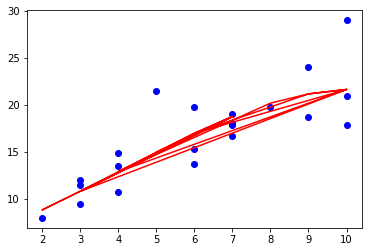

In [198]:
plt.scatter(Time.Sorting_Time,Time.Delivery_Time,c="b")
plt.plot(Time.Sorting_Time,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

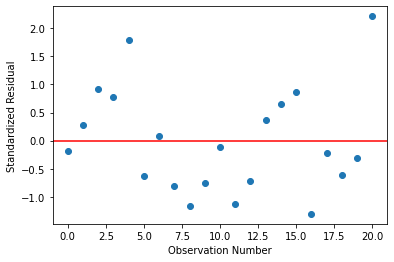

In [199]:
plt.scatter(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

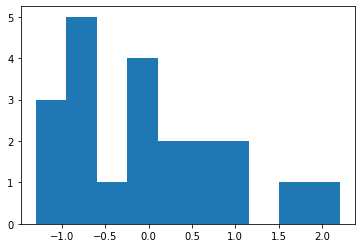

In [200]:
plt.hist(model4.resid_pearson)

In [201]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

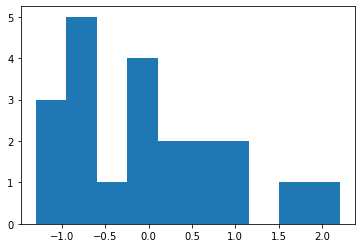

In [202]:
plt.hist(model4.resid_pearson)